In [5]:
#a
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns # used for plotting 
import numpy as np

df_cities_men = pd.read_excel(io="C:/Python/Databehandling/Databehandling-PHILIP-Forsting/Exercises/Data/komtopp50_2020.xlsx", sheet_name="Män", usecols="A:F", header=6)
df_cities_women = pd.read_excel(io="C:/Python/Databehandling/Databehandling-PHILIP-Forsting/Exercises/Data/komtopp50_2020.xlsx", sheet_name="Kvinnor", usecols="A:F", header=6)

#a
df_cities_men.columns = ["Rang 2020", "Rang 2019", "Kommun", "Folkmängd 2020", "Folkmängd 2019", "Förändring"]
df_cities_women.columns = ["Rang 2020", "Rang 2019", "Kommun", "Folkmängd 2020", "Folkmängd 2019", "Förändring"]

df_cities_men["Kön"] = "Man"
df_cities_women["Kön"] = "Kvinna"

df_cities_men


,Rang 2020,Rang 2019,Kommun,Folkmängd 2020,Folkmängd 2019,Förändring,Kön
0,81,83,Ale,16256,16054,1.258253,Man
1,64,64,Alingsås,20702,20646,0.271239,Man
2,122,123,Alvesta,10367,10339,0.270819,Man
3,255,255,Aneby,3503,3498,0.142939,Man
4,169,168,Arboga,7094,7114,-0.281136,Man
...,...,...,...,...,...,...,...
285,52,55,Österåker,23647,23132,2.226353,Man
286,115,115,Östhammar,11405,11447,-0.366908,Man
287,158,156,Östra Göinge,7747,7745,0.025823,Man
288,284,284,Överkalix,1730,1737,-0.402994,Man


In [2]:
#b
df_cities_men_and_female = pd.concat([df_cities_men, df_cities_women])
df_cities_men_and_female = df_cities_men_and_female.set_index("Kommun")
df_cities_men_and_female.drop(["Rang 2020", "Rang 2019"], axis=1, inplace=True)
df_cities_men_and_female

,Folkmängd 2020,Folkmängd 2019,Förändring,Kön
Kommun,,,,
Ale,16256,16054,1.258253,Man
Alingsås,20702,20646,0.271239,Man
Alvesta,10367,10339,0.270819,Man
Aneby,3503,3498,0.142939,Man
Arboga,7094,7114,-0.281136,Man
...,...,...,...,...
Österåker,22997,22442,2.473042,Kvinna
Östhammar,10846,10803,0.398038,Kvinna
Östra Göinge,7270,7262,0.110162,Kvinna


In [3]:
#c
df_cities_tot = pd.read_excel(io="C:/Python/Databehandling/Databehandling-PHILIP-Forsting/Exercises/Data/komtopp50_2020.xlsx", sheet_name="Totalt", usecols="A:F", header=6)
df_cities_tot.columns = ["Rang 2020", "Rang 2019", "Kommun", "Folkmängd 2020", "Folkmängd 2019", "Förändring"]
df_cities_tot = df_cities_tot.set_index("Kommun")
df_cities_tot = df_cities_tot.drop(["Rang 2020", "Rang 2019"], axis=1)
df_cities_tot = df_cities_tot.rename(columns={"Folkmängd 2020":"Total Pop 2020", "Folkmängd 2019":"Total Pop 2019", "Förändring":"Total förändring"})
df_cities_tot

,Total Pop 2020,Total Pop 2019,Total förändring
Kommun,,,
Ale,31868,31402,1.483982
Alingsås,41602,41420,0.439401
Alvesta,20224,20134,0.447005
Aneby,6821,6848,-0.394276
Arboga,14039,14087,-0.340740
...,...,...,...
Österåker,46644,45574,2.347830
Östhammar,22251,22250,0.004494
Östra Göinge,15017,15007,0.066636


In [4]:
#d
df_cities_final = pd.merge(df_cities_men_and_female, df_cities_tot, on="Kommun").sort_values(by="Total Pop 2020", ascending=False)

#cities_sweden_final = pd.merge(cities_gender_merged.set_index("Kommun"), cities_sweden.set_index("Kommun"), on="Kommun").sort_values(by="Total Pop 2020", ascending=False)

df_cities_final

,Folkmängd 2020,Folkmängd 2019,Förändring,Kön,Total Pop 2020,Total Pop 2019,Total förändring
Kommun,,,,,,,
Stockholm,492569,491853,0.145572,Kvinna,975551,974073,0.151734
Stockholm,482982,482220,0.158019,Man,975551,974073,0.151734
Göteborg,290551,288973,0.546072,Kvinna,583056,579281,0.651670
Göteborg,292505,290308,0.756782,Man,583056,579281,0.651670
Malmö,172538,170623,1.122357,Man,347949,344166,1.099179
...,...,...,...,...,...,...,...
Dorotea,1327,1356,-2.138643,Man,2498,2551,-2.077617
Sorsele,1157,1170,-1.111111,Kvinna,2442,2489,-1.888309
Sorsele,1285,1319,-2.57771,Man,2442,2489,-1.888309


Text(0.5, 1.0, '3e: Sveriges 10 minsta kommuner 2020')

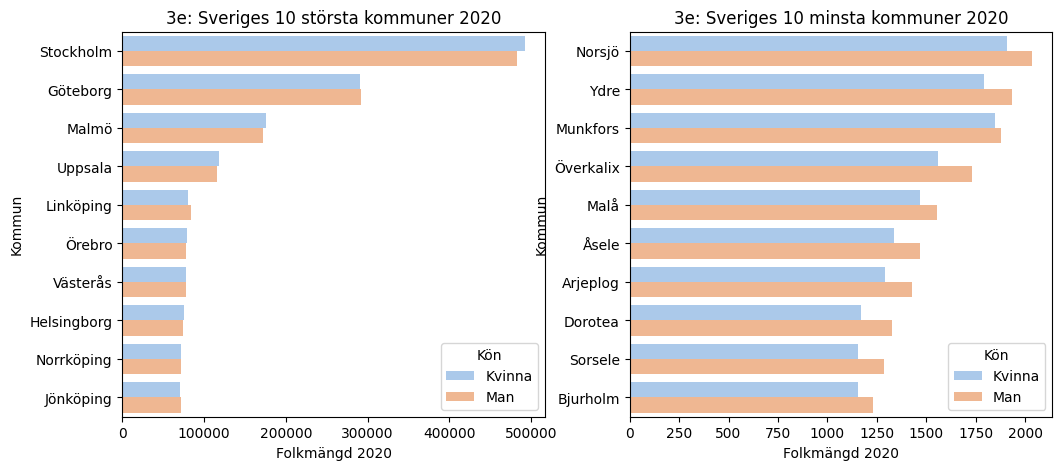

In [5]:
#e
df_cities_top10 = df_cities_final.iloc[:20]
df_cities_low10 = df_cities_final.iloc[-20:]

fig, axes = plt.subplots(1, 2, figsize=(12,5))
sns.barplot(data=df_cities_top10, x="Folkmängd 2020", y="Kommun", palette='pastel', hue="Kön", ax=axes[0])
axes[0].set_title("3e: Sveriges 10 största kommuner 2020")

sns.barplot(data=df_cities_low10, x="Folkmängd 2020", y="Kommun", palette='pastel', hue="Kön", ax=axes[1])
axes[1].set_title("3e: Sveriges 10 minsta kommuner 2020")


([<matplotlib.patches.Wedge at 0x1b61d001be0>,
 [Text(-1.0999444606586752, -0.011053663026178643, 'Kvinnor'),
  Text(1.0999444596923291, 0.011053759186381202, 'Män')],
 [Text(-0.5999697058138228, -0.006029270741551986, '50.3%'),
  Text(0.5999697052867249, 0.006029323192571564, '49.7%')])

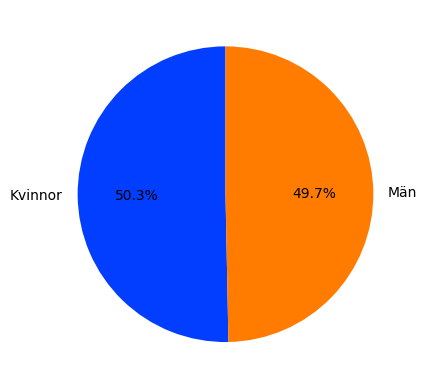

In [6]:
#f Create a pie chart showing the total male and female population in Sweden 2020. (*)

plt.pie([df_cities_final.loc[df_cities_final["Kön"] == "Man", "Folkmängd 2020"].sum(),
        df_cities_final.loc[df_cities_final["Kön"] == "Kvinna", "Folkmängd 2020"].sum()], 
        labels=["Kvinnor", "Män"], colors=sns.color_palette("bright"), autopct="%.1f%%", startangle=90)


<Axes: xlabel='Kommun', ylabel='Folkmängd 2020'>

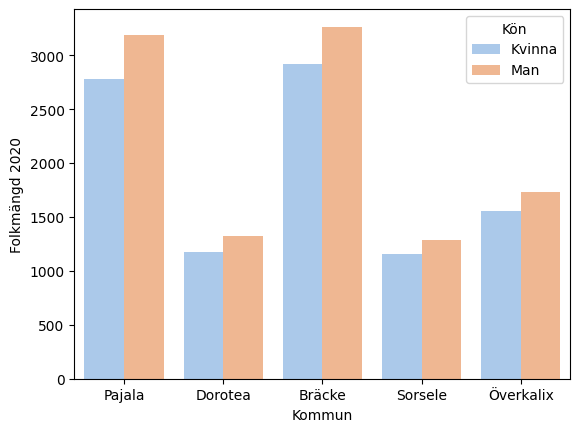

In [53]:
#g Create a barplot showing the cities with the five largest percentual gender difference in 2020. (**)

df_cities_final = pd.merge(df_cities_men_and_female, df_cities_tot, on="Kommun").sort_values(by="Total Pop 2020", ascending=False) # För att kunna generera om df_cities_final
df_cities_final = df_cities_final.sort_values(by="Kommun")
df_cities_men_and_female = df_cities_men_and_female.sort_values(by="Kommun")
df_cities_final["Könsskillnad (%)"] = 100 * np.abs(df_cities_final["Folkmängd 2020"] - (df_cities_final["Total Pop 2020"] - df_cities_final["Folkmängd 2020"])) / df_cities_final["Total Pop 2020"]

df_cities_final = df_cities_final.sort_values(by="Könsskillnad (%)")
df_cities_final_bigSexDiff = df_cities_final.iloc[-10:].sort_values(by="Könsskillnad (%)", ascending=False)

sns.barplot(data=df_cities_final_bigSexDiff, x="Kommun", y="Folkmängd 2020", palette='pastel', hue="Kön")


<Axes: xlabel='Kommun', ylabel='Tillväxt %'>

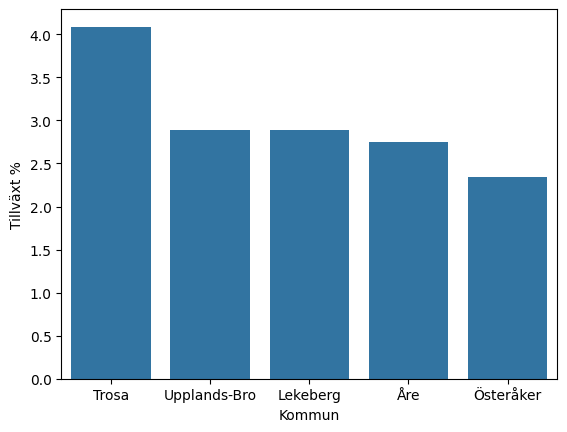

In [55]:
# h) Create a barplot showing the top 5 cities with largest populational growth from 2019 to 2020 (**)

df_cities_final["Tillväxt %"] = 100 * (df_cities_final["Total Pop 2020"] - df_cities_final["Total Pop 2019"]) / df_cities_final["Total Pop 2019"]
df_cities_final_topp10tillvaxt = df_cities_final.sort_values(by="Tillväxt %", ascending=False).iloc[:10]
df_cities_final_topp10tillvaxt
sns.barplot(data=df_cities_final_topp10tillvaxt, x="Kommun", y="Tillväxt %")